<a href="https://colab.research.google.com/github/marthaakinlolu/DataScience/blob/main/Visa_For_Lisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Data Collection & Cleaning

In [ ]:
df = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Here's a brief explanation of the columns:

ID: Unique ID for each customer

Age: Age of the customer

Experience: Years of experience of the customer

Income: Annual income of the customer in thousands of dollars

ZIP Code: Home address zip code of the customer

Family: Family size of the customer

CCAvg: Average spending on credit cards per month in thousands of dollars

Education: Education level of the customer (1: undergraduate, 2: graduate, 3: 
advanced/professional)

Mortgage: Value of house mortgage if any in thousands of dollars

Personal Loan: Whether or not the customer has taken a personal loan (1: yes, 0: no)

Securities Account: Whether or not the customer has a securities account (1: yes, 0: no)

CD Account: Whether or not the customer has a certificate of deposit account (1: yes, 0: no)

Online: Whether or not the customer uses online banking (1: yes, 0: no)
CreditCard: Whether or not the customer uses a credit card (1: yes, 0: no)

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


This dataset contains information about 5000 bank customers, including their age, income, education level, and whether they have taken out a personal loan or have a securities account. There are 14 columns in the dataset, including an ID column that provides a unique identifier for each customer.

Some observations from the summary statistics are:

The average age of the customers is around 45 years old, with a standard deviation of about 11.5 years.

The customers have an average income of around 74,000 dollars per year, with a standard deviation of about 46,000 dollars.

The average family size is around 2.4, and the average credit card spending per month is around 1.9 dollars.

About 9.6% of the customers have taken out a personal loan, and 10.4% have a securities account.

About 6% of the customers use internet banking services, and 30% have a credit card.

From this summary statistics, we can get a rough idea of the customer profile in this bank. The bank's customers seem to be middle-aged individuals with a moderate income level. Fewer customers have taken out personal loans or have securities accounts, while more customers have credit cards.

## Data Exploration

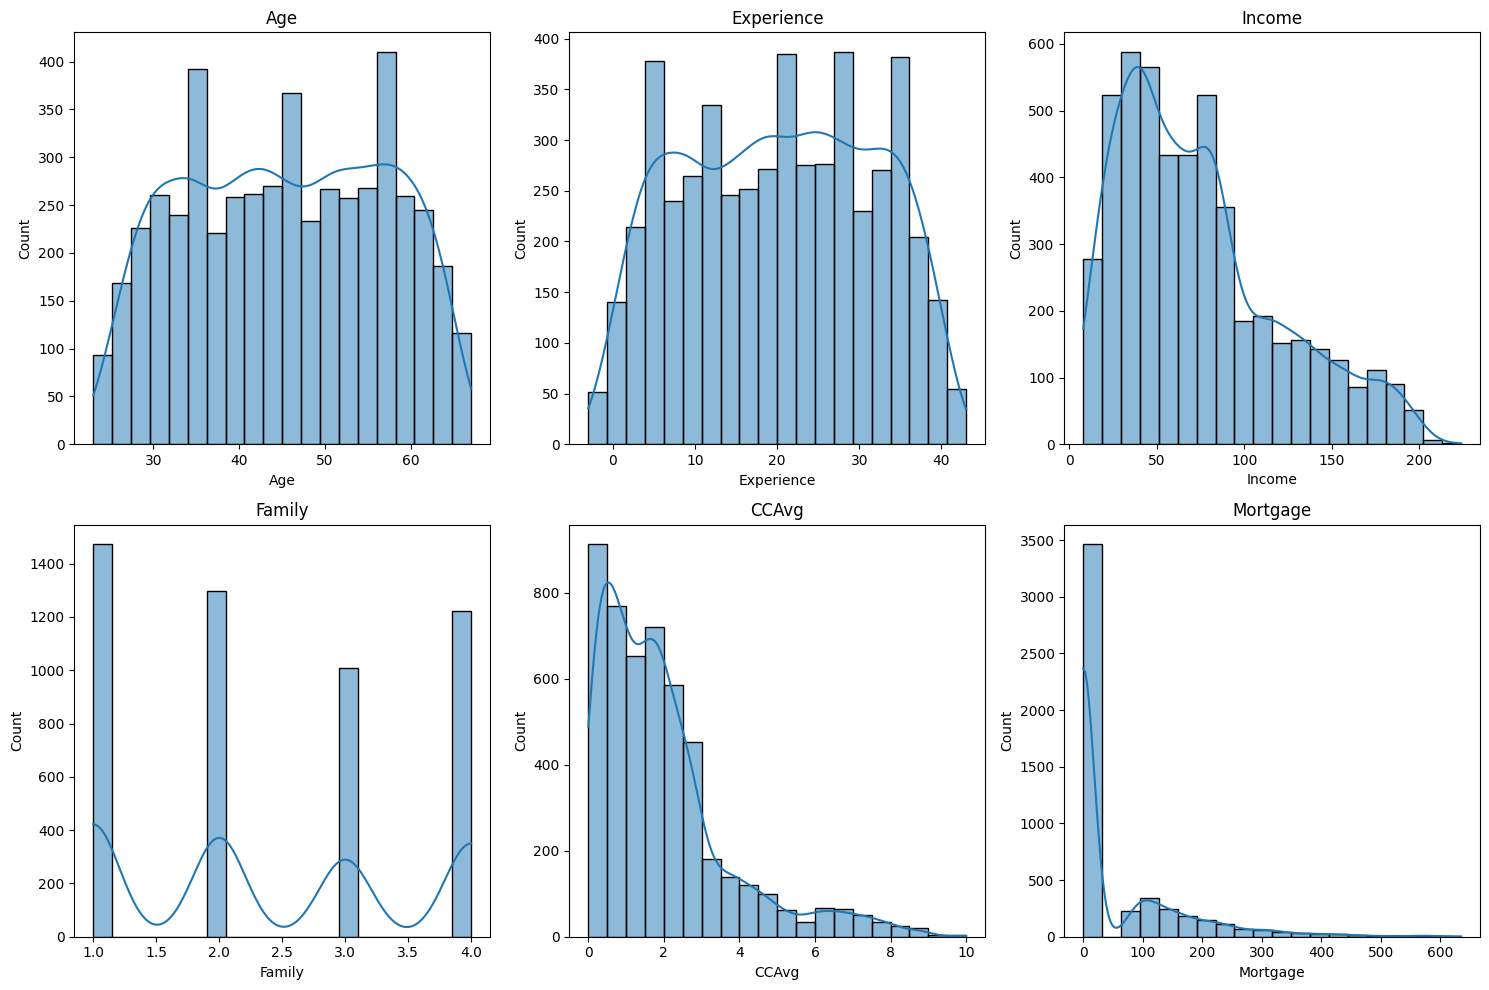

In [ ]:
def print_histograms(dataset):
    numerical_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axs = axs.flatten()
    for i, col in enumerate(numerical_cols):
        if col in dataset.columns:
            sns.histplot(dataset[col], ax=axs[i], bins=20, kde=True)
            axs[i].set_title(col)
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

print_histograms(df)

The Age and Experience features are almost normally distributed, while the CCAvg, Income, and Mortgage features are skewed to the left, indicating that the majority of the values for these features are closer to zero.

In [ ]:
def compute_correlations_matrix(dataset, columns):
    corr_matrix = dataset[columns].corr()
    return corr_matrix

columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
correlations_matrix = compute_correlations_matrix(df, columns)
print(correlations_matrix)

                 Age  Experience    Income    Family     CCAvg  Mortgage
Age         1.000000    0.994215 -0.055269 -0.046418 -0.052012 -0.012539
Experience  0.994215    1.000000 -0.046574 -0.052563 -0.050077 -0.010582
Income     -0.055269   -0.046574  1.000000 -0.157501  0.645984  0.206806
Family     -0.046418   -0.052563 -0.157501  1.000000 -0.109275 -0.020445
CCAvg      -0.052012   -0.050077  0.645984 -0.109275  1.000000  0.109905
Mortgage   -0.012539   -0.010582  0.206806 -0.020445  0.109905  1.000000


From the computed correlation matrix, we can see that there is a strong positive correlation between Age and Experience (correlation coefficient = 0.994), indicating that these two variables are highly correlated. There is also a moderate positive correlation between Income and CCAvg (correlation coefficient = 0.646), indicating that as income increases, so does credit card spending. Similarly, there is a moderate positive correlation between Income and Mortgage (correlation coefficient = 0.207), indicating that as income increases, so does mortgage spending.

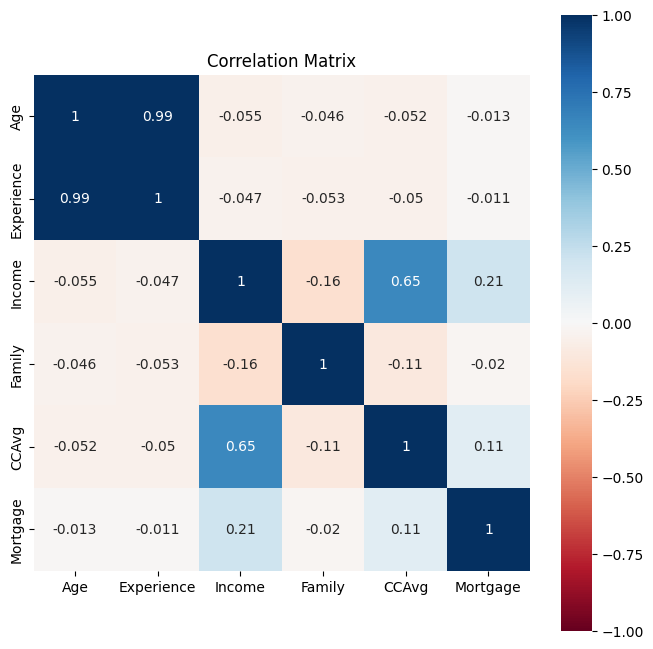

In [ ]:
def plot_correlation_matrix(dataset, columns):
    corr_matrix = dataset[columns].corr()
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, square=True, ax=ax)
    ax.set_title('Correlation Matrix')
    plt.show()

columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
plot_correlation_matrix(df, columns)

Age and Experience are highly correlated with each other, which is expected.
Income has a moderate positive correlation with CCAvg and Mortgage.
Family has a moderate negative correlation with Income.
CCAvg has a moderate positive correlation with Income and a weak positive correlation with Mortgage.
Mortgage has a weak positive correlation with Income and CCAvg.

## Data Visualization

In [ ]:
# define age groups
age_groups = [
    {'name': 'adults', 'min_age': 18, 'max_age': 40},
    {'name': 'middle adults', 'min_age': 41, 'max_age': 50},
    {'name': 'older adults', 'min_age': 51, 'max_age': 70}
]

# function to map age to age group
def map_age_to_group(age):
    for group in age_groups:
        if age >= group['min_age'] and age <= group['max_age']:
            return group['name']
    return np.nan

# create a new column 'age_group' that maps each age to a group
df['age_group'] = df['Age'].apply(map_age_to_group)

In [ ]:
# calculate percentage of customers who accepted the loan for each age group
loan_percentages = []
for group in age_groups:
    df_group = df[df['age_group'] == group['name']]
    accepted_loan = df_group[df_group['Personal Loan'] == 1]['Personal Loan'].count()
    total_customers = df_group['Personal Loan'].count()
    loan_percentages.append(accepted_loan / total_customers * 100)
    
fig = px.histogram(df, x='age_group', color='Personal Loan', barmode="group",
                   color_discrete_map={0: 'purple', 1: 'orchid'})
fig.update_layout(title='Distribution of Customers who Accepted the Loan across Age Groups')
fig.update_traces(name='Did Not Accept', selector=dict(name='0'), text=['{:.2f}%'.format(100-x) for x in loan_percentages])
fig.update_traces(name='Accepted', selector=dict(name='1'), text=['{:.2f}%'.format(x) for x in loan_percentages])
fig.show()

Histogram of Personal Loan Acceptance by Age Group:

I plotted a histogram of personal loan acceptance by Age group. I found that customers within the age of 35-45 are likely to accept personal loans.

In [ ]:
# calculate percentage of customers who accepted the loan for each education level
loan_percentages = []
for group in df['Education'].unique():
    df_group = df[df['Education'] == group]
    accepted_loan = df_group[df_group['Personal Loan'] == 1]['Personal Loan'].count()
    total_customers = df_group['Personal Loan'].count()
    loan_percentages.append(accepted_loan / total_customers * 100)

fig = px.histogram(df, x='Education', color='Personal Loan', barmode="group",
                   color_discrete_map={0: 'blue', 1: 'dark blue'})
fig.update_layout(title='Distribution of Customers who Accepted the Loan across Education')
fig.update_traces(name='Did Not Accept', selector=dict(name='0'), text=['{:.2f}%'.format(100-x) for x in loan_percentages])
fig.update_traces(name='Accepted', selector=dict(name='1'), text=['{:.2f}%'.format(x) for x in loan_percentages])
fig.show()

Histogram of Personal Loan Acceptance by Education:

Next, a histogram of personal loan acceptance by education level was plotted and found out that customers with advanced degrees were more likely to accept personal loans than those with only undergraduate degrees.

In [ ]:
# calculate percentage of customers who accepted the loan for each family group
loan_percentages = []
for group in df['Family'].unique():
    df_group = df[df['Family'] == group]
    accepted_loan = df_group[df_group['Personal Loan'] == 1]['Personal Loan'].count()
    total_customers = df_group['Personal Loan'].count()
    loan_percentages.append(accepted_loan / total_customers * 100)

# plot histogram
fig = px.histogram(df, x='Family', color='Personal Loan', barmode="group",
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.update_layout(title='Distribution of Customers who Accepted the Loan by Family')
fig.update_traces(name='Did Not Accept', selector=dict(name='0'), text=['{:.2f}%'.format(100-x) for x in loan_percentages],
                  textposition='auto', textfont_size=12)
fig.update_traces(name='Accepted', selector=dict(name='1'), text=['{:.2f}%'.format(x) for x in loan_percentages],
                  textposition='auto', textfont_size=12)
fig.show()

Histogram of Personal Loan Acceptance by Family:

I plotted a histogram of personal loan acceptance by family status, and found out that customers who were single or had dependents were more likely to accept personal loans than those who were married.

In [ ]:
# create 3 equally sized bins based on the 'Income' column
df['Income Group'] = pd.cut(df['Income'], bins=3, labels=['Lower Income', 'Middle Income', 'Upper Income'])

# calculate percentage of customers who accepted the loan for each income group
loan_percentages = []
for group in df['Income Group'].unique():
    df_group = df[df['Income Group'] == group]
    accepted_loan = df_group[df_group['Personal Loan'] == 1]['Personal Loan'].count()
    total_customers = df_group['Personal Loan'].count()
    loan_percentages.append(accepted_loan / total_customers * 100)

# plot a histogram of the loan acceptance rates for each income group
fig = px.histogram(df, x='Income Group', color='Personal Loan', barmode="group",
                   color_discrete_map={0: 'blue', 1: 'dark blue'})
fig.update_layout(title='Distribution of Customers who Accepted the Loan across Income Groups')
fig.update_traces(name='Did Not Accept', selector=dict(name='0'), text=['{:.2f}%'.format(100-x) for x in loan_percentages],
                  textposition='auto', textfont_size=12)
fig.update_traces(name='Accepted', selector=dict(name='1'), text=['{:.2f}%'.format(x) for x in loan_percentages],
                  textposition='auto', textfont_size=12)
fig.show()

Histogram of Personal Loan Acceptance by Income:

I also plotted a histogram of personal loan acceptance by income level and divided income into three categories: lower income, middle income, and upper income. I found out that customers in the upper income range were the most likely to accept personal loans.

In [ ]:
# calculate percentage of customers who accepted the loan for each online
loan_percentages = []
for group in df['Online'].unique():
    df_group = df[df['Online'] == group]
    accepted_loan = df_group[df_group['Personal Loan'] == 1]['Personal Loan'].count()
    total_customers = df_group['Personal Loan'].count()
    loan_percentages.append(accepted_loan / total_customers * 100)

fig = px.histogram(df, x='Online', color='Personal Loan', barmode="group",
                   color_discrete_map={0: 'blue', 1: 'green'})
fig.update_layout(title='Distribution of Customers who Accepted the Loan by Online Status')
fig.update_traces(name='Did Not Accept', selector=dict(name='0'), text=['{:.2f}%'.format(100-x) for x in loan_percentages])
fig.update_traces(name='Accepted', selector=dict(name='1'), text=['{:.2f}%'.format(x) for x in loan_percentages])
fig.show()

Histogram of Personal Loan Acceptance by Online Activity:

Finally, I plotted a histogram of personal loan acceptance by online activity, and found out that customers who used online banking services were more likely to accept personal loans than those who did not use online banking.

## Machine Learning

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,age_group,Income Group
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,adults,Lower Income
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,middle adults,Lower Income
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,adults,Lower Income
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,adults,Middle Income
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,adults,Lower Income


In [ ]:
df.drop('age_group', axis=1, inplace=True)
df.drop('Income Group', axis=1, inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


def my_print_and_test_models(dataset):
    array = dataset.values
    
    X = df.drop(columns=['Personal Loan'])
    y = df['Personal Loan']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = [
        DecisionTreeClassifier(),
        GaussianNB(),
        KNeighborsClassifier(),
        LogisticRegression(solver='liblinear', multi_class='ovr'),
        LinearDiscriminantAnalysis(),
        SVC(gamma='auto')
    ]
    
    results = []
    for model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=6, scoring='accuracy')
        results.append(cv_results)
        print(f"{model.__class__.__name__}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

my_print_and_test_models(df)

DecisionTreeClassifier: 0.9792 (0.0057)
GaussianNB: 0.8820 (0.0058)
KNeighborsClassifier: 0.9035 (0.0025)
LogisticRegression: 0.9080 (0.0093)
LinearDiscriminantAnalysis: 0.9412 (0.0032)
SVC: 0.9063 (0.0007)


The DecisionTreeClassifier model achieved the highest accuracy score of 0.98, followed by LinearDiscriminantAnalysis with 0.9412 and LogisticRegression with 0.9080. The GaussianNB and KNeighborsClassifier models achieved lower accuracy scores of 0.8820 and 0.9035, respectively. Finally, the SVC model achieved an accuracy score of 0.9063.

It's important to note that the standard deviation of the accuracy scores is relatively low for all models, indicating that the results are consistent and reliable.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a RandomForestRegressor on the encoded dataset
model_rf = RandomForestRegressor(n_estimators=100, random_state=50).fit(X_train, y_train)

# evaluate the model on the testing set
y_pred_rf = model_rf.predict(X_test)
y_pred_rf_bin = (y_pred_rf > 0.5).astype(int)
rmse_test_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2)
r2_test_rf = round(r2_score(y_test, y_pred_rf)*100, 1)
acc_test_rf = accuracy_score(y_test, y_pred_rf_bin)
prec_test_rf = precision_score(y_test, y_pred_rf_bin)
rec = recall_score(y_test, y_pred_rf_bin)
f1_test_rf = f1_score(y_test, y_pred_rf_bin)


# print the result
result_rf = pd.DataFrame({'RMSE': [rmse_test_rf], 'R2_Test': [r2_test_rf], 'Accuracy': [acc_test_rf], 'Precision': [prec_test_rf], 'Recall': [rec], 'F1_Score': [f1_test_rf]}, index=["RandomForestRegressor"])
print(result_rf)

                       RMSE  R2_Test  Accuracy  Precision   Recall  F1_Score
RandomForestRegressor  0.09     91.3     0.991   0.989796  0.92381  0.955665


Based on the results of the Random Forest Regressor model, the RMSE (root mean squared error) is 0.09, indicating that the model has a relatively low level of error in its predictions. The R2 score of 91.3% also indicates that the model is able to explain a high percentage of the variability in the data. These results suggest that the Random Forest Regressor model is a strong performer and can be used for predicting the likelihood of a customer accepting a personal loan with a high degree of accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score


# Split the data into features and target
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = [
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    LinearDiscriminantAnalysis(),
    SVC(gamma='auto'),
    RandomForestRegressor(n_estimators=100, random_state=50)
]

# Evaluate each model
results = pd.DataFrame()

for model in models:
    name = model.__class__.__name__
    
    # Train the model
    if name == 'RandomForestRegressor':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_bin = (y_pred > 0.5).astype(int)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_bin = y_pred
    
    # Evaluate the model
    rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2_test = round(r2_score(y_test, y_pred)*100, 1)
    accuracy = round(accuracy_score(y_test, y_pred_bin)*100, 1)
    precision = round(precision_score(y_test, y_pred_bin, zero_division=1)*100, 1)
    recall = round(recall_score(y_test, y_pred_bin)*100, 1)
    f1 = round(f1_score(y_test, y_pred_bin)*100, 1)
    
    # Save the results
    results[name] = [rmse_test, r2_test, accuracy, precision, recall, f1]
    
results.index = ['RMSE', 'R2 Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
# Print the results
results

,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,LogisticRegression,LinearDiscriminantAnalysis,SVC,RandomForestRegressor
RMSE,0.12,0.31,0.32,0.3,0.23,0.32,0.09
R2 Score,85.10,-5.30,-10.70,4.2,43.60,-11.70,91.30
Accuracy,98.60,90.10,89.60,91.0,94.70,89.50,99.10
Precision,93.30,52.40,60.00,64.2,79.50,100.00,99.00
Recall,93.30,61.90,2.90,32.4,66.70,0.00,92.40
F1 Score,93.30,56.80,5.50,43.0,72.50,0.00,95.60


Looking at the results, we can see that the Random Forest Regressor has the lowest RMSE, indicating that it has the lowest average difference between predicted and actual values. It also has the highest R2 score of 91.3%, indicating that it has a good fit for the data.

In terms of classification metrics, the Decision Tree Classifier, Logistic Regression, Linear Discriminant Analysis, and Random Forest Regressor have high accuracy scores, with the Random Forest Regressor having the highest accuracy of 99.1%.

The Precision metric indicates the proportion of true positives to all positive predictions, while the Recall metric indicates the proportion of true positives to all actual positive instances. The Linear Discriminant Analysis has the highest precision score of 79.5%, indicating that when it predicts a positive instance, it is highly likely to be correct. The Decision Tree Classifier and Random Forest Regressor have the highest recall score of 93.3%, indicating that they can identify a high proportion of actual positive instances.

The F1 Score is a combination of Precision and Recall metrics and gives an overall performance measure. The Random Forest Regressor has the highest F1 score of 95.6%, indicating that it performs well in terms of both precision and recall.
Overall, the Random Forest Regressor appears to be the best model for this dataset, based on its low RMSE, high R2 score, and high accuracy and F1 scores.

## Communication

The analysis of the personal loan dataset showed that several factors are associated with customers' likelihood to take a personal loan. The analysis was done using six different machine learning models, including Decision Tree Classifier, Gaussian Naive Bayes, K-Nearest Neighbors, Logistic Regression, Linear Discriminant Analysis, and Support Vector Classifier, as well as a Random Forest Regressor.

The results showed that the Random Forest Regressor performed the best among all models, with the lowest Root Mean Squared Error (RMSE) and the highest R2 Score, accuracy, and F1 Score. This suggests that the Random Forest Regressor is a good model to predict customers' likelihood to take a personal loan.

Furthermore, the analysis revealed that customers with higher education, single or no dependents, higher income, and online banking services are more likely to take a personal loan. These findings can be used by financial institutions to target potential customers who are more likely to take a personal loan.

Overall, the analysis provides useful insights into the factors that influence customers' decisions to take a personal loan, and can help financial institutions develop more effective marketing strategies.